In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ushape.csv',names=['X','Y','class'])
df

,X,Y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0
...,...,...,...
95,1.699453,0.587720,1.0
96,0.218623,-0.652521,1.0
97,0.952914,-0.419766,1.0
98,-1.318500,0.423112,0.0


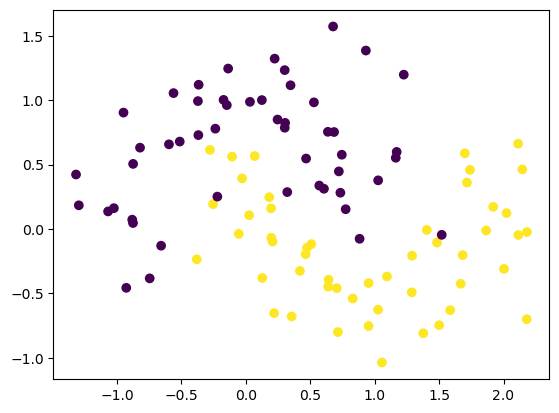

In [4]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [5]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

# 1. Zero Initialization

# Relu Activation

In [45]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.get_weights()

[array([[ 0.20939279,  1.1626359 ],
        [ 1.1357208 , -1.0653837 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.13529742],
        [0.5885867 ]], dtype=float32),
 array([0.], dtype=float32)]

#### Changed default wei and bias as 0

In [47]:
initial_weights = model.get_weights()

In [48]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [49]:
model.set_weights(initial_weights)

In [50]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [51]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [52]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.5312 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5547 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4844 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4805 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4922 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4961 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5312 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5273 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 

In [53]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.00139885], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 4s 419us/step


<Axes: >

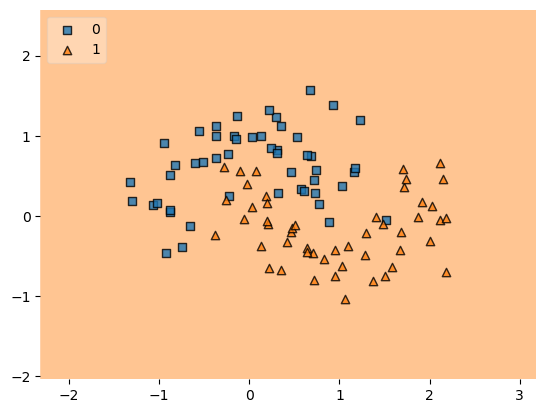

In [54]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

# Tanh

In [55]:
model = Sequential()

model.add(Dense(2, activation='tanh', input_dim=2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.get_weights()

[array([[ 0.30150485, -0.17367959],
        [ 0.5756012 ,  0.20565462]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.79839045],
        [ 1.2326969 ]], dtype=float32),
 array([0.], dtype=float32)]

#### Changed default wei and bias as 0

In [57]:
initial_weights = model.get_weights()

In [58]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [59]:
model.set_weights(initial_weights)

In [60]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [61]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [62]:
history = model.fit(X, y, epochs=100, validation_split=0.2)
model.get_weights()

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.4437 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5039 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4961 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5117 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4766 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5039 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4766 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss:

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.00017765], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 4s 423us/step


<Axes: >

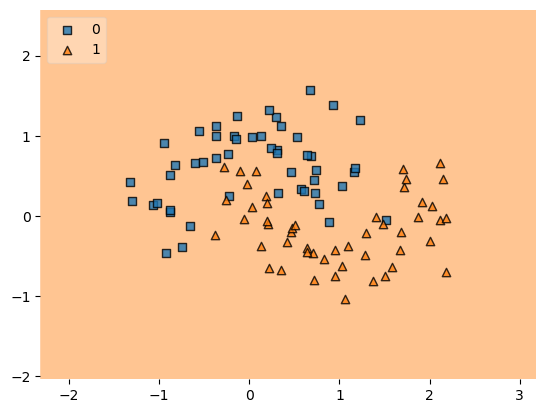

In [63]:
plot_decision_regions(X, y.astype('int'), clf=model, legend=2)

# Sigmoid

In [72]:
model = Sequential()

model.add(Dense(10, activation='sigmoid', input_dim=2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [73]:
model.get_weights()

[array([[-0.37109593,  0.5668294 , -0.29551464,  0.5820759 , -0.3852463 ,
         -0.05061316, -0.5508956 , -0.44731224,  0.49156588, -0.15304583],
        [-0.02254939,  0.40871602,  0.304923  , -0.49372318,  0.5425531 ,
         -0.24660155,  0.35599202, -0.03266567, -0.6592035 ,  0.35440236]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.6525688 ],
        [-0.1800242 ],
        [-0.40343013],
        [-0.3867131 ],
        [-0.5436758 ],
        [-0.60148674],
        [-0.36484578],
        [ 0.5779037 ],
        [ 0.34582466],
        [ 0.3651479 ]], dtype=float32),
 array([0.], dtype=float32)]

#### Changed default wei and bias as 0

In [74]:
initial_weights = model.get_weights()
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [75]:
model.set_weights(initial_weights)

In [76]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [77]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [79]:
history = model.fit(X, y, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5078 - loss: 0.6719 - val_accuracy: 0.5000 - val_loss: 0.6654
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5469 - loss: 0.6635 - val_accuracy: 0.5000 - val_loss: 0.6646
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5039 - loss: 0.6710 - val_accuracy: 0.5000 - val_loss: 0.6640
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4805 - loss: 0.6741 - val_accuracy: 0.5000 - val_loss: 0.6633
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4688 - loss: 0.6780 - val_accuracy: 0.5000 - val_loss: 0.6626
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5273 - loss: 0.6661 - val_accuracy: 0.5000 - val_loss: 0.6619
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5352 - loss: 0.6628 - val_accuracy: 0.5000 - val_loss: 0.6611
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4688 - loss: 0.6749 - val_accuracy: 0.5000 - val_loss: 

In [80]:
model.get_weights()

[array([[ 0.8309881 ,  0.8309881 ,  0.8309881 ,  0.8309881 ,  0.8309881 ,
          0.8309881 ,  0.8309881 ,  0.8309881 ,  0.83098817,  0.83098817],
        [-0.983277  , -0.983277  , -0.983277  , -0.983277  , -0.983277  ,
         -0.983277  , -0.983277  , -0.983277  , -0.983277  , -0.983277  ]],
       dtype=float32),
 array([-0.5044368, -0.5044368, -0.5044368, -0.5044368, -0.5044368,
        -0.5044368, -0.5044368, -0.5044368, -0.5044368, -0.5044368],
       dtype=float32),
 array([[0.16578095],
        [0.16578095],
        [0.16578095],
        [0.16578095],
        [0.16578095],
        [0.16578095],
        [0.16578095],
        [0.16578095],
        [0.16578095],
        [0.16578095]], dtype=float32),
 array([-0.31209746], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 4s 423us/step


<Axes: >

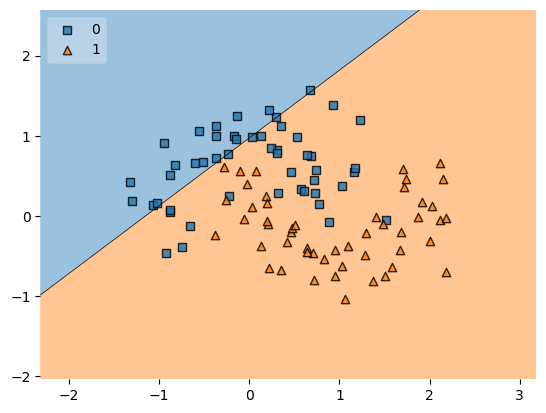

In [81]:
plot_decision_regions(X, y.astype('int'), clf=model, legend=2)

# 2. Constant initialization

In [92]:
model = Sequential()

model.add(Dense(2, activation='relu', input_dim=2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [93]:
model.get_weights()

[array([[ 0.4147663 , -0.45581883],
        [-1.034239  , -0.04586709]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.13231611],
        [ 1.3723246 ]], dtype=float32),
 array([0.], dtype=float32)]

#### Changed default wei and bias as 0

In [94]:
initial_weights = model.get_weights()

In [95]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)*.5
initial_weights[1] = np.zeros(model.get_weights()[1].shape)*.5
initial_weights[2] = np.zeros(model.get_weights()[2].shape)*.5
initial_weights[3] = np.zeros(model.get_weights()[3].shape)*.5

In [96]:
model.set_weights(initial_weights)

In [97]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [98]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [99]:
history = model.fit(X, y, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.5078 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4844 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5391 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4805 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5078 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4758 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5156 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 

In [100]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.00028386], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 4s 425us/step


<Axes: >

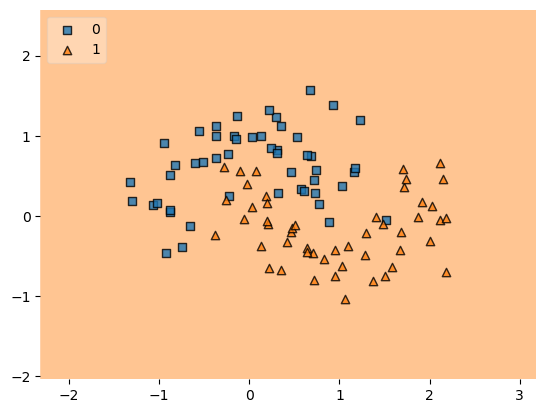

In [101]:

plot_decision_regions(X, y.astype('int'), clf=model, legend=2)

In [9]:
model = Sequential()

model.add(Dense(2,activation='tanh',input_dim=2))
model.add(Dense(2,activation='tanh'))
model.add(Dense(2,activation='tanh'))
model.add(Dense(2,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27 (108.00 B)

 Trainable params: 27 (108.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.get_weights()

[array([[ 1.1874613 , -0.6733159 ],
        [-0.87213326, -0.35941583]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.45650733,  0.953905  ],
        [ 0.538705  , -0.9226041 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.570462 , -1.1414934],
        [ 1.1564101,  0.6121546]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.2782086, -0.4256705],
        [ 1.2139674, -0.7021455]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.27664983],
        [-0.3502953 ]], dtype=float32),
 array([0.], dtype=float32)]

In [12]:
initial_weights = model.get_weights()

In [13]:
initial_weights[0] = np.random.randn(model.get_weights()[0].shape[0],model.get_weights()[0].shape[1]) * 0.01
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(model.get_weights()[2].shape[0],model.get_weights()[2].shape[1]) * 0.01
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(model.get_weights()[4].shape[0],model.get_weights()[4].shape[1]) * 0.01
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(model.get_weights()[6].shape[0],model.get_weights()[6].shape[1]) * 0.01
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(model.get_weights()[8].shape[0],model.get_weights()[8].shape[1]) * 0.01
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [14]:
model.set_weights(initial_weights)

In [15]:
model.get_weights()

[array([[-9.4638700e-03, -2.0969366e-03],
        [-3.0923679e-03, -8.6624685e-05]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.01758713, -0.01287241],
        [-0.00590335, -0.00203827]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.00109338,  0.00632192],
        [ 0.00875618, -0.01344658]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.00817733, -0.02398822],
        [-0.00728634,  0.0151912 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.00382044],
        [-0.0012711 ]], dtype=float32),
 array([0.], dtype=float32)]

In [16]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.5117 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4594 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4766 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5156 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5156 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4922 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5312 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4766 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss:

In [19]:
model.get_weights()

[array([[-1.0286390e-02, -2.1129632e-03],
        [-2.3456470e-03, -7.2043185e-05]], dtype=float32),
 array([-5.6916319e-06, -9.7920164e-08], dtype=float32),
 array([[ 0.01768136, -0.01319585],
        [-0.00587627, -0.00213131]], dtype=float32),
 array([-8.7718385e-05,  2.2909709e-04], dtype=float32),
 array([[-0.00139136,  0.00648986],
        [ 0.00897346, -0.01356788]], dtype=float32),
 array([-0.00013896, -0.00040907], dtype=float32),
 array([[ 0.00699128, -0.01448562],
        [-0.00548796,  0.00648602]], dtype=float32),
 array([0.00014148, 0.0017304 ], dtype=float32),
 array([[ 0.00020042],
        [-0.00182297]], dtype=float32),
 array([0.00191565], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 5s 467us/step


<Axes: >

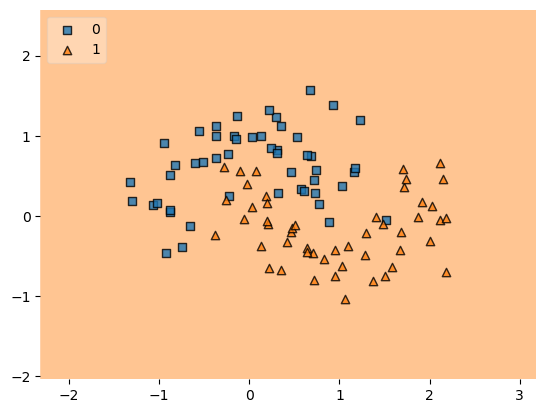

In [18]:
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)